### Problem 1

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
digits = datasets.load_digits()

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 60% train, 20% validation and 20% test subsets
X_train, X_temp, y_train, y_temp = train_test_split(data, digits.target, test_size=0.6, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

### Problem 2

In [4]:
import numpy as np

# Initialize weights and bias randomly
def initialize_weights(input_size):
    return np.random.randn(input_size)

# Linear activation function
def linear_activation(z):
    return z
    
# Sigmoid activation function
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

# RELU activation function
def relu_activation(z):
    return np.maximum(0, z)

In [5]:
# Implement perceptron with SGD and activation functions
def perceptron_train(X_train, y_train, X_val, y_val, activation_fn):
    # Initialize weights and biases

    num_features = X_train.shape[1]
    weights = initialize_weights(num_features)
    bias = np.random.randn()
    learning_rate = 0.0001
    epochs = 30
    
    train_loss = []
    val_loss = []
    
    # Training loop
    for epoch in range(epochs):
        epoch_train_loss = 0
        epoch_val_loss = 0
        
        # Training
        for i in range(len(X_train)):
            # Forward pass
            if activation_fn == 'linear':
                prediction = linear_activation(np.dot(X_train[i], weights) + bias)
            elif activation_fn == 'sigmoid':
                prediction = sigmoid_activation(np.dot(X_train[i], weights) + bias)
            elif activation_fn == 'relu':
                prediction = relu_activation(np.dot(X_train[i], weights) + bias)
            
            # Calculate loss (using cross-entropy loss)
            epoch_train_loss += 0.5 * (prediction - y_train[i])**2  # Loss for individual sample
            
            # Backpropagation and weight update
            gradient = prediction - y_train[i]

            # Gradient Clipping
            gradient = np.clip(gradient, -1, 1)
            
            weights -= learning_rate * gradient * X_train[i]
            bias -= learning_rate * gradient
        
        # Compute average loss for the epoch
        epoch_train_loss /= len(X_train)
        train_loss.append(epoch_train_loss)
        
        # Validation
        for i in range(len(X_val)):
            prediction = linear_activation(np.dot(X_val[i], weights) + bias)
            epoch_val_loss += 0.5 * (prediction - y_val[i])**2
        
        # Compute average validation loss for the epoch
        epoch_val_loss /= len(X_val)
        val_loss.append(epoch_val_loss)

        # # Print epoch-wise losses
        # print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {epoch_train_loss}, Validation Loss: {epoch_val_loss}")
    
    return weights, bias, train_loss, val_loss

In [6]:
import matplotlib.pyplot as plt

def plot_graph(train_loss, val_loass, activation_fn):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Perceptron Learning Curves ({activation_fn})')
    plt.legend()
    plt.show()

linear


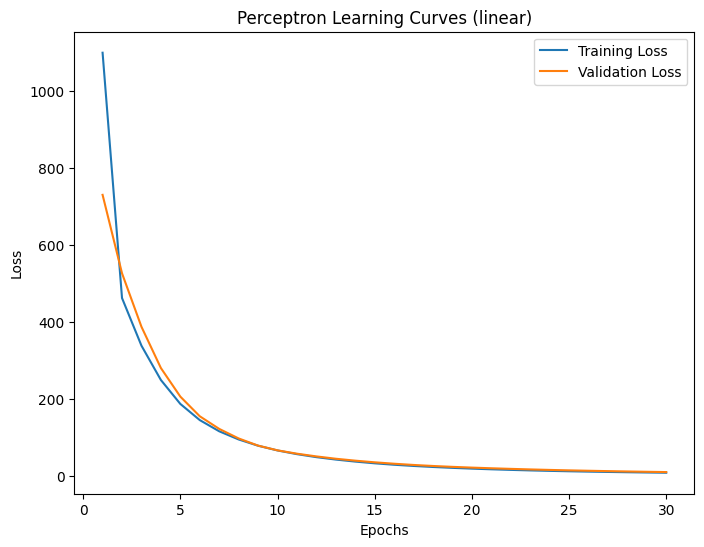

Epoch 1/30 - Training Loss: 1098.9411772292842, Validation Loss: 729.7836333023788
Epoch 2/30 - Training Loss: 461.71460818569835, Validation Loss: 525.9986085461541
Epoch 3/30 - Training Loss: 338.0375121725961, Validation Loss: 387.17702778440895
Epoch 4/30 - Training Loss: 248.8926004536321, Validation Loss: 279.9463061184341
Epoch 5/30 - Training Loss: 186.7548721040558, Validation Loss: 205.70769126312723
Epoch 6/30 - Training Loss: 144.77426620085524, Validation Loss: 154.69093819046478
Epoch 7/30 - Training Loss: 115.68237576860574, Validation Loss: 121.91378485306967
Epoch 8/30 - Training Loss: 94.46742556645123, Validation Loss: 97.07628859587797
Epoch 9/30 - Training Loss: 78.20138816307141, Validation Loss: 78.46550680736766
Epoch 10/30 - Training Loss: 65.89718581932746, Validation Loss: 66.15980269417068
Epoch 11/30 - Training Loss: 56.286808219779076, Validation Loss: 57.49180708288194
Epoch 12/30 - Training Loss: 48.524194158550245, Validation Loss: 50.41633993940873
Epo

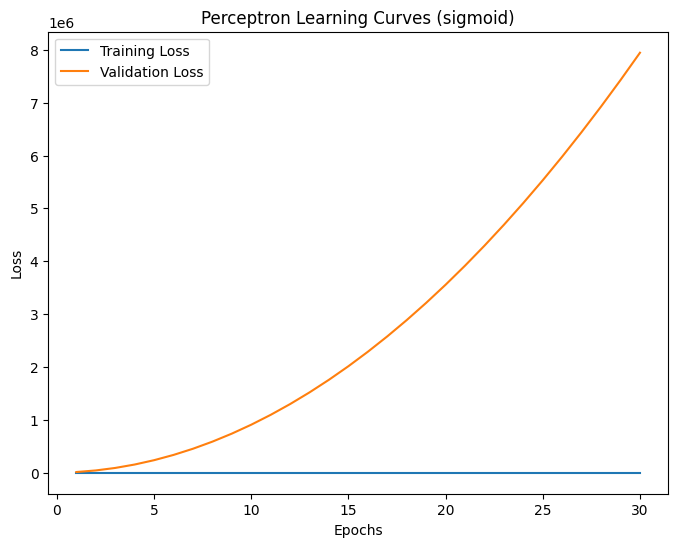

Epoch 1/30 - Training Loss: 10.245221371190377, Validation Loss: 13193.143913120462
Epoch 2/30 - Training Loss: 10.145543175487465, Validation Loss: 43062.00920792745
Epoch 3/30 - Training Loss: 10.145543175487465, Validation Loss: 90331.38840615423
Epoch 4/30 - Training Loss: 10.145543175487465, Validation Loss: 155001.2815078
Epoch 5/30 - Training Loss: 10.145543175487465, Validation Loss: 237071.68851286444
Epoch 6/30 - Training Loss: 10.145543175487465, Validation Loss: 336542.60942134744
Epoch 7/30 - Training Loss: 10.145543175487465, Validation Loss: 453414.04423324997
Epoch 8/30 - Training Loss: 10.145543175487465, Validation Loss: 587685.9929485705
Epoch 9/30 - Training Loss: 10.145543175487465, Validation Loss: 739358.4555673097
Epoch 10/30 - Training Loss: 10.145543175487465, Validation Loss: 908431.4320894682
Epoch 11/30 - Training Loss: 10.145543175487465, Validation Loss: 1094904.9225150472
Epoch 12/30 - Training Loss: 10.145543175487465, Validation Loss: 1298778.926844045

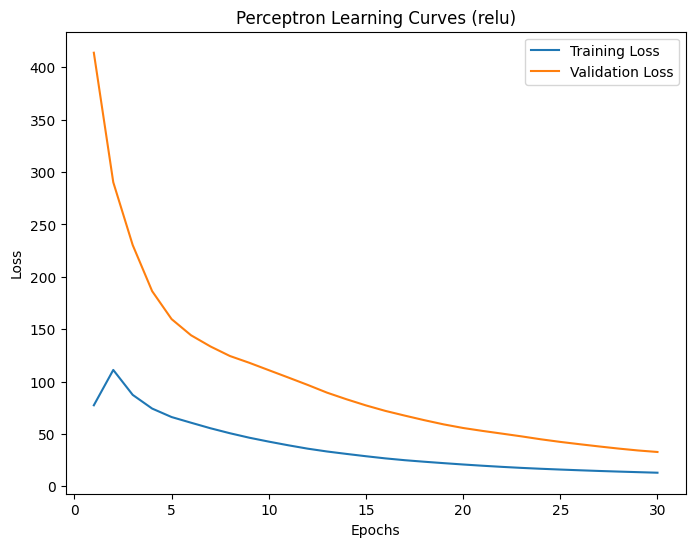

Epoch 1/30 - Training Loss: 77.28871027813909, Validation Loss: 413.9584405025585
Epoch 2/30 - Training Loss: 111.03949245049965, Validation Loss: 290.27262417030875
Epoch 3/30 - Training Loss: 87.2325874345159, Validation Loss: 230.28016081752375
Epoch 4/30 - Training Loss: 74.15151227907799, Validation Loss: 186.2809318712501
Epoch 5/30 - Training Loss: 66.06321693092767, Validation Loss: 159.5976497122012
Epoch 6/30 - Training Loss: 60.65159536664704, Validation Loss: 144.165806234962
Epoch 7/30 - Training Loss: 55.35154962525028, Validation Loss: 133.4668659668382
Epoch 8/30 - Training Loss: 50.599959451116824, Validation Loss: 124.35404744146304
Epoch 9/30 - Training Loss: 46.32039399480129, Validation Loss: 117.86363014692778
Epoch 10/30 - Training Loss: 42.59126522007603, Validation Loss: 110.83497494985599
Epoch 11/30 - Training Loss: 39.11016708881608, Validation Loss: 103.84511166428186
Epoch 12/30 - Training Loss: 35.876472199121366, Validation Loss: 96.76036711797288
Epoch 

In [7]:
# Training and Evaluation for each activation function
activation_functions = ['linear', 'sigmoid', 'relu']
results = []

for activation_fn in activation_functions:
    print(activation_fn)
    weights, bias, train_loss, val_loss = perceptron_train(X_train, y_train, X_val, y_val, activation_fn)
    plot_graph(train_loss, val_loss, activation_fn)
    for i in range(30):
        print(f"Epoch {i + 1}/30 - Training Loss: {train_loss[i]}, Validation Loss: {val_loss[i]}")
    # Evaluate performance on test set for each activation function

# Plot learning curves
# Plot training loss vs. validation loss for each activation function


### Problem 3


Training with linear activation
Epoch 0, Training Loss: 0.46569409126743744, Validation Loss: 0.5099615225806129
Epoch 1, Training Loss: 0.2579436149664479, Validation Loss: 0.3054811425337714
Epoch 2, Training Loss: 0.19897615555422274, Validation Loss: 0.2526678022290449
Epoch 3, Training Loss: 0.16172498249054845, Validation Loss: 0.21717312192465696
Epoch 4, Training Loss: 0.14046303017311995, Validation Loss: 0.1987931221746115
Epoch 5, Training Loss: 0.13070094653174796, Validation Loss: 0.19628067453048462
Epoch 6, Training Loss: 0.11439058209163143, Validation Loss: 0.1836944738718336
Epoch 7, Training Loss: 0.10364081234675167, Validation Loss: 0.17238909773783442
Epoch 8, Training Loss: 0.09567404837012378, Validation Loss: 0.17288316742451748
Epoch 9, Training Loss: 0.08542732201681408, Validation Loss: 0.16145293010130374
Epoch 10, Training Loss: 0.08758073508372956, Validation Loss: 0.15619738350883103
Epoch 11, Training Loss: 0.07471207089296265, Validation Loss: 0.15473

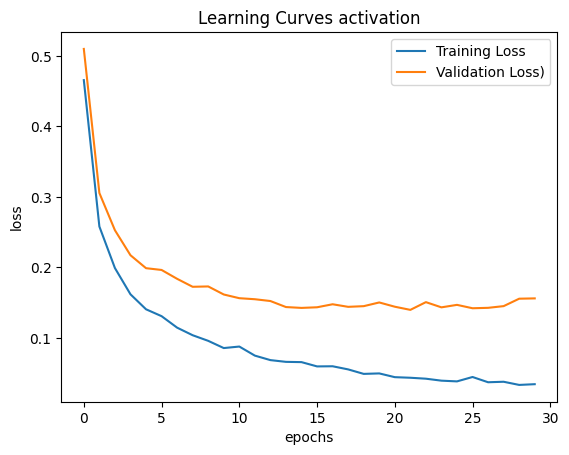


Training with relu activation
Epoch 0, Training Loss: 1.4643361893808327, Validation Loss: 1.4635098286766892
Epoch 1, Training Loss: 0.8261035182537708, Validation Loss: 0.8293383740277758
Epoch 2, Training Loss: 0.508923636429033, Validation Loss: 0.5166813225423049
Epoch 3, Training Loss: 0.34951106105863006, Validation Loss: 0.36717197109809296
Epoch 4, Training Loss: 0.31556435536054134, Validation Loss: 0.33435292886709334
Epoch 5, Training Loss: 0.28226499340502587, Validation Loss: 0.2943787280094471
Epoch 6, Training Loss: 0.19958261419191817, Validation Loss: 0.22175421410662688
Epoch 7, Training Loss: 0.1871330373218141, Validation Loss: 0.21739594011021832
Epoch 8, Training Loss: 0.16804611681995307, Validation Loss: 0.18965666423799585
Epoch 9, Training Loss: 0.13797311875174942, Validation Loss: 0.19104533363406945
Epoch 10, Training Loss: 0.11516420366323107, Validation Loss: 0.16588508599872992
Epoch 11, Training Loss: 0.11131756231027723, Validation Loss: 0.1592369373

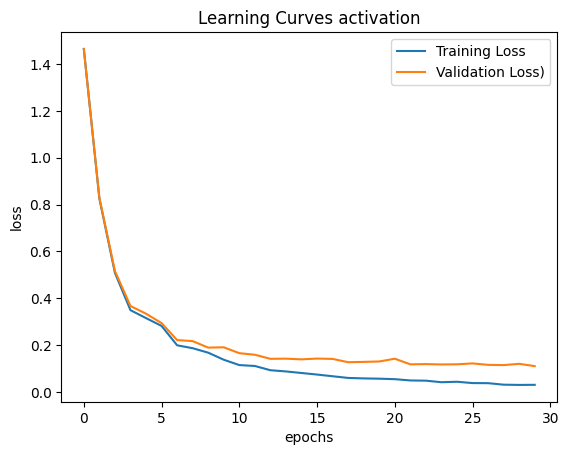


Training with sigmoid activation
Epoch 0, Training Loss: 2.3042870202487107, Validation Loss: 2.3046318698225137
Epoch 1, Training Loss: 2.3056581010384805, Validation Loss: 2.3056716640481043
Epoch 2, Training Loss: 2.305592257071291, Validation Loss: 2.305338418862984
Epoch 3, Training Loss: 2.3038240291805563, Validation Loss: 2.303760509109213
Epoch 4, Training Loss: 2.2968202359794523, Validation Loss: 2.297200675967743
Epoch 5, Training Loss: 2.2981189708401804, Validation Loss: 2.2984377369423696
Epoch 6, Training Loss: 2.300954224521617, Validation Loss: 2.3007388683035805
Epoch 7, Training Loss: 2.293967368208919, Validation Loss: 2.294480553509379
Epoch 8, Training Loss: 2.2928282757352427, Validation Loss: 2.2933296647422776
Epoch 9, Training Loss: 2.2912595774050173, Validation Loss: 2.291863769305299
Epoch 10, Training Loss: 2.2904258096346783, Validation Loss: 2.290614820898297
Epoch 11, Training Loss: 2.2869619083128034, Validation Loss: 2.287149532614304
Epoch 12, Trai

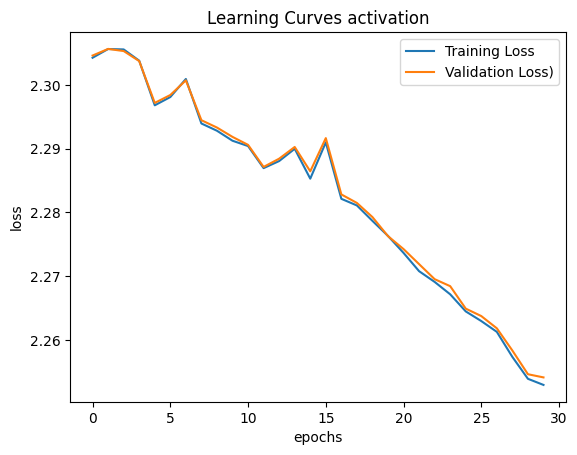

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

# Activation functions and their derivatives as required in the question
def custom_softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def custom_relu(z):
    return np.maximum(0, z)

def custom_relu_derivative(z):
    return (z > 0).astype(float)

def custom_sigmoid(z):
    return 1 / (1 + np.exp(-z))

def custom_sigmoid_derivative(z):
    s = custom_sigmoid(z)
    return s * (1 - s)

def custom_linear(z):
    return z

def custom_linear_derivative(z):
    return np.ones_like(z)

def custom_cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

def custom_one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

def custom_compute_f1_score(y_true, y_pred):
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    return f1_score(y_true_labels, y_pred_labels, average='weighted')

class CustomNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        self.activation_name = activation
        self.weights1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2. / hidden_size)
        self.bias2 = np.zeros((1, hidden_size))
        self.weights3 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2. / hidden_size)
        self.bias3 = np.zeros((1, hidden_size))
        self.weights4 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.bias4 = np.zeros((1, output_size))

    def custom_activation(self, z):
        if self.activation_name == 'relu':
            return custom_relu(z)
        elif self.activation_name == 'sigmoid':
            return custom_sigmoid(z)
        elif self.activation_name == 'linear':
            return custom_linear(z)
        else:
            raise ValueError(f'Invalid activation function: {self.activation_name}')

    def custom_activation_derivative(self, z):
        if self.activation_name == 'relu':
            return custom_relu_derivative(z)
        elif self.activation_name == 'sigmoid':
            return custom_sigmoid_derivative(z)
        elif self.activation_name == 'linear':
            return custom_linear_derivative(z)
        else:
            raise ValueError(f'Invalid activation function: {self.activation_name}')

    def custom_forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.custom_activation(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.custom_activation(self.z2)
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = self.custom_activation(self.z3)
        self.z4 = np.dot(self.a3, self.weights4) + self.bias4
        return custom_softmax(self.z4)

    def custom_backward(self, X, y, output):
        d_loss_output = output - y
        d_loss_w4 = np.dot(self.a3.T, d_loss_output)
        d_loss_b4 = np.sum(d_loss_output, axis=0, keepdims=True)
        d_loss_a3 = np.dot(d_loss_output, self.weights4.T) * self.custom_activation_derivative(self.a3)
        d_loss_w3 = np.dot(self.a2.T, d_loss_a3)
        d_loss_b3 = np.sum(d_loss_a3, axis=0, keepdims=True)
        d_loss_a2 = np.dot(d_loss_a3, self.weights3.T) * self.custom_activation_derivative(self.a2)
        d_loss_w2 = np.dot(self.a1.T, d_loss_a2)
        d_loss_b2 = np.sum(d_loss_a2, axis=0, keepdims=True)
        d_loss_a1 = np.dot(d_loss_a2, self.weights2.T) * self.custom_activation_derivative(self.a1)
        d_loss_w1 = np.dot(X.T, d_loss_a1)
        d_loss_b1 = np.sum(d_loss_a1, axis=0, keepdims=True)
        self.weights1 -= custom_learning_rate * d_loss_w1
        self.bias1 -= custom_learning_rate * d_loss_b1
        self.weights2 -= custom_learning_rate * d_loss_w2
        self.bias2 -= custom_learning_rate * d_loss_b2
        self.weights3 -= custom_learning_rate * d_loss_w3
        self.bias3 -= custom_learning_rate * d_loss_b3
        self.weights4 -= custom_learning_rate * d_loss_w4
        self.bias4 -= custom_learning_rate * d_loss_b4

    def custom_train(self, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):
        training_losses = []
        validation_losses = []
        validation_f1_scores = []
        for epoch in range(epochs):
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train[indices]
            for start_idx in range(0, X_train.shape[0], batch_size):
                end_idx = min(start_idx + batch_size, X_train.shape[0])
                batch_X = X_train_shuffled[start_idx:end_idx]
                batch_y = y_train_shuffled[start_idx:end_idx]
                output = self.custom_forward(batch_X)
                self.custom_backward(batch_X, batch_y, output)
            train_loss = custom_cross_entropy_loss(y_train, self.custom_forward(X_train))
            training_losses.append(train_loss)
            val_loss = custom_cross_entropy_loss(y_val, self.custom_forward(X_val))
            validation_losses.append(val_loss)
            val_f1_score = custom_compute_f1_score(y_val, self.custom_forward(X_val))
            validation_f1_scores.append(val_f1_score)
            print(f'Epoch {epoch}, Training Loss: {train_loss}, Validation Loss: {val_loss}')
        return training_losses, validation_losses, validation_f1_scores

# Preprocessing
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data_padded = np.pad(data, ((0, 0), (1, 1)), 'constant', constant_values=0)

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_padded)

X_train, X_temp, y_train, y_temp = train_test_split(data_normalized, digits.target, test_size=0.4, stratify=digits.target, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

y_train_encoded = custom_one_hot_encode(y_train, 10)
y_val_encoded = custom_one_hot_encode(y_val, 10)
y_test_encoded = custom_one_hot_encode(y_test, 10)

# Training and Evaluation with various activation functions mentioned in the question
activation_functions = ['linear', 'relu', 'sigmoid']
custom_learning_rate = 0.001
custom_epochs = 30
custom_batch_size = 64

for activation_function in activation_functions:
    print(f"\nTraining with {activation_function} activation")
    nn = CustomNeuralNetwork(66, 128, 10, activation=activation_function)
    training_losses, validation_losses, validation_f1_scores = nn.custom_train(X_train, y_train_encoded, X_val, y_val_encoded, custom_epochs, custom_learning_rate, custom_batch_size)
    final_f1_score = validation_f1_scores[-1]
    plt.figure()
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label=f'Validation Loss)')
    plt.title(f'Learning Curves activation')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()